In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [ ]:
from bs4 import BeautifulSoup
import requests
import json 

# Get the HTML content of the webpage
url = "https://industrial.omron.com.tr/tr/products/e2e-next"  # Replace with the actual URL
response = requests.get(url)
html_content = response.content


# Sitenizin ana URL'sini burada belirtin
base_url = "https://industrial.omron.com.tr/tr/products/e2e-next"

# BeautifulSoup ile HTML içeriğini analiz et
soup = BeautifulSoup(html_content, 'html.parser')

# Ürün bilgilerini çekmek için uygun seçiciler
products = []

rows = soup.find_all('tr', {'class': 'filtered hidden'})  # İlgili ürün satırlarını bul

for row in rows:
    product = {}
    # Ürün adı 
    product_link_tag = row.find('a', href=True)
    product['name'] = product_link_tag.text.strip()  # Ürün adı
        
    # Özellikler
    product['size'] = row.find('td', {'data-filter': 'Size'}).text.strip()
    product['mounting_type'] = row.find('td', {'data-filter': 'Mounting type'}).text.strip()
    product['sensing_distance'] = row.find('td', {'data-filter': 'Sensing distance'}).text.strip()
    product['output_type'] = row.find('td', {'data-filter': 'Output type'}).text.strip()
    product['operation_mode'] = row.find('td', {'data-filter': 'Operation mode'}).text.strip()
    product['connection_method'] = row.find('td', {'data-filter': 'Connection method'}).text.strip()
    product['material_housing'] = row.find('td', {'data-filter': 'Material housing'}).text.strip()
    product['io_link_baud_rate'] = row.find('td', {'data-filter': 'IO-Link baud rate'}).text.strip()
    product['overall_length'] = row.find('td', {'data-filter': 'Overall length of sensor'}).text.strip()
    product['thread_length'] = row.find('td', {'data-filter': 'Thread length'}).text.strip()
    product['degree_of_protection'] = row.find('td', {'data-filter': 'Degree of protection (IP)'}).text.strip()

     
    products.append(product)

# JSON formatında düzenli bir şekilde yazdır
print(json.dumps(products, indent=4, ensure_ascii=False))

# Veya aşğıdaki gibi print etmek istersenizde yan yana yazar
# Verileri yazdır
#for product in products:"""
    #print(product)


[
    {
        "name": "E2E-X10C1L30 5M",
        "size": "M30",
        "mounting_type": "Flush",
        "sensing_distance": "10 mm",
        "output_type": "NPN",
        "operation_mode": "NO",
        "connection_method": "Cable",
        "material_housing": "Brass, nickel plated",
        "io_link_baud_rate": "Not Applicable",
        "overall_length": "82.3 mm",
        "thread_length": "65 mm",
        "degree_of_protection": "IP67/IP67G/IP69K"
    },
    {
        "name": "E2E-X10C1L30-M1",
        "size": "M30",
        "mounting_type": "Flush",
        "sensing_distance": "10 mm",
        "output_type": "NPN",
        "operation_mode": "NO",
        "connection_method": "Connector M12",
        "material_housing": "Brass, nickel plated",
        "io_link_baud_rate": "Not Applicable",
        "overall_length": "80 mm",
        "thread_length": "65 mm",
        "degree_of_protection": "IP67/IP69K"
    },
    {
        "name": "E2E-X10C230 2M",
        "size": "M30",
        "

In [3]:
import csv
import pandas as pd

# ... (Your existing code for data extraction) ...

# Create a CSV file
with open('proximity sensor.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['name','size', 'mounting_type', 'sensing_distance', 'output_type', 
                  'operation_mode', 'connection_method', 'material_housing', 'io_link_baud_rate', 
                  'overall_length', 'thread_length', 'degree_of_protection']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for product in products:
        writer.writerow(product)

print("Data exported to proximity sensor")

Data exported to proximity sensor


In [4]:
import numpy as np
labels = ['Flush', 'Non-flush', 'Quasi-flush']
pd.read_csv("proximity sensor.csv")['mounting_type'] = np.random.choice(labels, size=1006, p=[0.3, 0.3, 0.4])

pd.read_csv("proximity sensor.csv")

,name,size,mounting_type,sensing_distance,output_type,operation_mode,connection_method,material_housing,io_link_baud_rate,overall_length,thread_length,degree_of_protection
0,E2E-X10C1L30 5M,M30,Flush,10 mm,NPN,NO,Cable,"Brass, nickel plated",Not Applicable,82.3 mm,65 mm,IP67/IP67G/IP69K
1,E2E-X10C1L30-M1,M30,Flush,10 mm,NPN,NO,Connector M12,"Brass, nickel plated",Not Applicable,80 mm,65 mm,IP67/IP69K
2,E2E-X10C230 2M,M30,Flush,10 mm,NPN,NC,Cable,"Brass, nickel plated",Not Applicable,60.3 mm,39 mm,IP67/IP67G/IP69K
3,E2E-X10C230 5M,M30,Flush,10 mm,NPN,NC,Cable,"Brass, nickel plated",Not Applicable,60.3 mm,39 mm,IP67/IP67G/IP69K
4,E2E-X10C230-M1,M30,Flush,10 mm,NPN,NC,Connector M12,"Brass, nickel plated",Not Applicable,58 mm,39 mm,IP67/IP69K
...,...,...,...,...,...,...,...,...,...,...,...,...
1001,E2E-X9C1L12 2M,M12,Quasi-flush,9 mm,NPN,NO,Cable,"Brass, nickel plated",Not Applicable,69.1 mm,54 mm,IP67/IP67G/IP69K
1002,E2E-X9C1L12-M1,M12,Quasi-flush,9 mm,NPN,NO,Connector M12,"Brass, nickel plated",Not Applicable,70 mm,54 mm,IP67/IP69K
1003,E2E-X9C212-M1,M12,Quasi-flush,9 mm,NPN,NC,Connector M12,"Brass, nickel plated",Not Applicable,48 mm,28 mm,IP67/IP69K
1004,E2E-X9C2L12 2M,M12,Flush,9 mm,NPN,NC,Cable,"Brass, nickel plated",Not Applicable,69.1 mm,54 mm,IP67/IP67G/IP69K


In [19]:
df = pd.DataFrame(pd.read_csv("proximity sensor.csv"))


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df['size'] = LabelEncoder().fit_transform(df['size'])  # size column encoding
df['mounting_type'] = LabelEncoder().fit_transform(df['mounting_type'])  # mounting_type column encoding
df['output_type'] = LabelEncoder().fit_transform(df['output_type'])  # output_type column encoding
df['operation_mode'] = LabelEncoder().fit_transform(df['operation_mode'])  # operation_mode column encoding
df['connection_method'] = LabelEncoder().fit_transform(df['connection_method'])  # connection_method column encoding
df['material_housing'] = LabelEncoder().fit_transform(df['material_housing'])  # material_housing column encoding
df['io_link_baud_rate'] = LabelEncoder().fit_transform(df['io_link_baud_rate'])  # io_link_baud_rate column encoding
df['overall_length'] = LabelEncoder().fit_transform(df['overall_length'])  # verall_length column encoding
df['thread_length'] = LabelEncoder().fit_transform(df['thread_length'])  # thread_length column encoding
df['degree_of_protection'] = LabelEncoder().fit_transform(df['degree_of_protection'])  # degree_of_protection column encoding
df

,name,size,mounting_type,sensing_distance,output_type,operation_mode,connection_method,material_housing,io_link_baud_rate,overall_length,thread_length,degree_of_protection
0,E2E-X10C1L30 5M,2,0,10 mm,2,1,0,0,2,19,26,0
1,E2E-X10C1L30-M1,2,0,10 mm,2,1,1,0,2,18,26,1
2,E2E-X10C230 2M,2,0,10 mm,2,0,0,0,2,13,16,0
3,E2E-X10C230 5M,2,0,10 mm,2,0,0,0,2,13,16,0
4,E2E-X10C230-M1,2,0,10 mm,2,0,1,0,2,12,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1001,E2E-X9C1L12 2M,0,2,9 mm,2,1,0,0,2,14,21,0
1002,E2E-X9C1L12-M1,0,2,9 mm,2,1,1,0,2,15,21,1
1003,E2E-X9C212-M1,0,2,9 mm,2,0,1,0,2,7,6,1
1004,E2E-X9C2L12 2M,0,0,9 mm,2,0,0,0,2,14,21,0


In [8]:
X = df[['size', 'output_type', 'operation_mode', 'connection_method', 'material_housing']]
y = df['mounting_type']

In [9]:
# Veriyi eğitim ve test setlerine ayırma
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_df

,size,output_type,operation_mode,connection_method,material_housing
576,2,3,0,1,0
215,1,2,0,0,0
604,0,1,1,0,0
548,3,2,0,0,0
290,3,0,0,0,2
...,...,...,...,...,...
106,1,2,1,0,0
270,3,2,1,0,2
860,3,0,0,0,2
435,0,2,1,0,0


In [10]:
# Veriyi standartlaştırma
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train.shape, X_test.shape

((905, 5), (101, 5))

In [11]:
# 1. Lojistik Regresyon Modeli
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
example_customer_info = [[2, 3, 0, 1, 0]]
example_customer_info = scaler.transform(example_customer_info)

tahmin = log_reg.predict(example_customer_info)
# tahmin edilen müşteri tipi 0: Loyal, 1: Lost, 2: One-time, 3: Potential
tahmin

c:\Users\Şehide\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2])

In [13]:
X_test_df

,size,output_type,operation_mode,connection_method,material_housing
927,0,1,1,0,0
630,0,3,0,1,0
682,3,1,1,0,2
514,1,2,1,1,0
365,2,2,0,1,0
...,...,...,...,...,...
184,1,1,1,0,0
332,1,0,1,0,0
88,1,1,1,0,0
63,0,0,0,0,0


In [14]:
y_test.to_list()

[1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 1]

In [15]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1])

In [16]:
# 2. Karar Ağacı Modeli
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

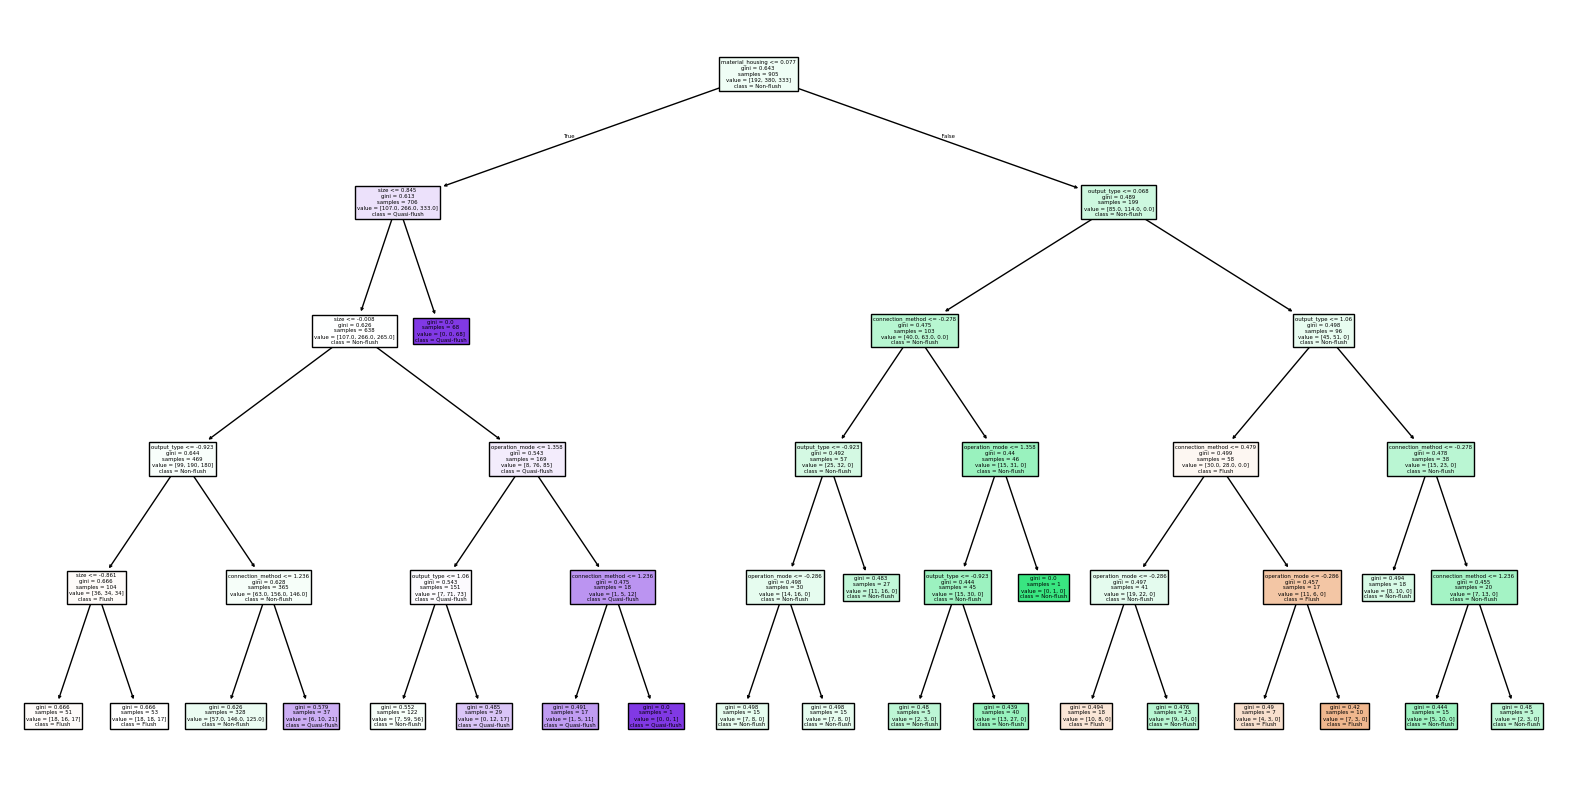

In [17]:
# Draw the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=labels)
plt.show()